In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Del a: Lese fil og se struktur

In [70]:
!pip install openpyxl

df = pd.read_excel("support_uke_24.xlsx", engine='openpyxl')

#printer ut de første radene for illustrasjon.
df.head(), df.columns

(   Ukedag Klokkeslett  Varighet  Tilfredshet
 0  Mandag    08:04:16  00:07:12          NaN
 1  Mandag    08:04:53  00:02:49          6.0
 2  Mandag    08:06:31  00:08:36          NaN
 3  Mandag    08:11:21  00:04:34          NaN
 4  Mandag    08:20:46  00:07:38          NaN,
 Index(['Ukedag', 'Klokkeslett', 'Varighet', 'Tilfredshet'], dtype='object'))

### Endre kolonne navn og legge inn i array

In [71]:
u_dag = df["Ukedag"].to_numpy()
kl_slett = df["Klokkeslett"].to_numpy()
varighet = df["Varighet"].to_numpy()
score = df["Tilfredshet"].to_numpy()

print(u_dag[:5], kl_slett[:5], varighet[:5], score[:5])

['Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'] ['08:04:16' '08:04:53' '08:06:31' '08:11:21' '08:20:46'] ['00:07:12' '00:02:49' '00:08:36' '00:04:34' '00:07:38'] [nan  6. nan nan nan]


## Del b: Antall henvendelser per dag for uke 24

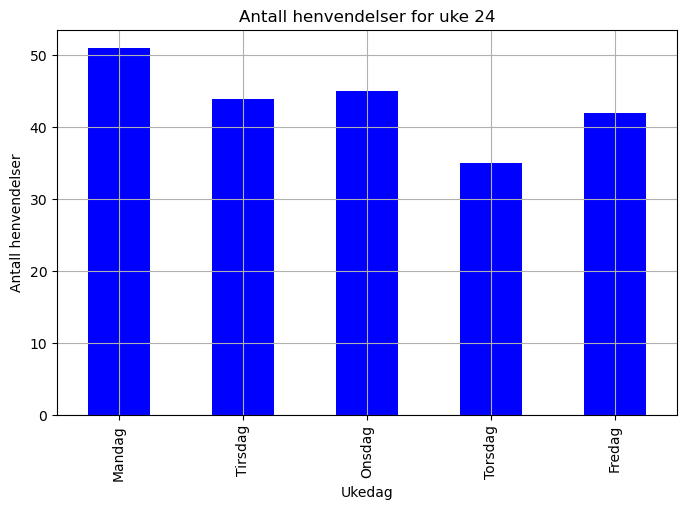

In [72]:
# Først definerer jeg ønsket rekkefølge.
ukedager_rekkefølge = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]

# Tell antall henvendelser og sorter i ønsket rekkefølge.
henvendelser_per_dag = df["Ukedag"].value_counts().reindex(ukedager_rekkefølge)

#Plotter søylediagram for antall henvendelser for hver ukedag i uke 24.
plt.figure(figsize=(8, 5))
henvendelser_per_dag.plot(kind='bar', color='b')
plt.title("Antall henvendelser for uke 24")
plt.xlabel("Ukedag")
plt.ylabel("Antall henvendelser")
plt.grid()
plt.show()

## Del c: Finne korteste og lengste samtaletid

In [73]:
# Finner min max i kolonnen "varighet"
min_varighet_np = np.min(varighet)
max_varighet_np = np.max(varighet)

print(f"Korteste samtale varte i {min_varighet_np} og lengste samtale varte i {max_varighet_np}")

Korteste samtale varte i 00:00:59 og lengste samtale varte i 00:11:28


## Del d: Beregne gjennomsnittlig samtaletid basert på alle henvendelser

In [75]:
# Konverterer kolonnen til timedelta-format
df["Varighet"] = pd.to_timedelta(df["Varighet"])

# Her velger jeg å bruke Pandas innebygde mean() funksjon for effketvit beregning. 
gjennomsnitt_varighet = df["Varighet"].mean()

print(f"Gjennomsnittlig samtaletid i uke 24 var {gjennomsnitt_varighet}")

Gjennomsnittlig samtaletid i uke 24 var 0 days 00:06:40.009216589


## Del e: Gruppere henvendesler etter 2-timers bolker

In [ ]:
df["Klokkeslett"] = pd.to_datetime(df["Klokkeslett"], format="%H:%M:%S").dt.time

# if-elif-else funksjon for å plassere klokkeslett i riktig tidsintervall
def intervall_2_timer(tid):
    if tid >= pd.to_datetime("08:00:00").time() and tid < pd.to_datetime("10:00:00").time():
        return "08-10"
    elif tid >= pd.to_datetime("10:00:00").time() and tid < pd.to_datetime("12:00:00").time():
        return "10-12"
    elif tid >= pd.to_datetime("12:00:00").time() and tid < pd.to_datetime("14:00:00").time():
        return "12-14"
    elif tid >= pd.to_datetime("14:00:00").time() and tid < pd.to_datetime("16:00:00").time():
        return "14-16"
    else:
        return "Utenfor vakt"

# Deretter pppretter jeg en ny kolonne med intervallene/bolkene for deretter å telle antall henvendelser per bolk
df["Tidsintervall"] = df["Klokkeslett"].apply(intervall_2_timer)
henvendelser_per_intervall = df["Tidsintervall"].value_counts().reindex(["08-10", "10-12", "12-14", "14-16"], fill_value=0)

# Plotte kakediragremmet
plt.figure(figsize=(6, 6))
henvendelser_per_intervall.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Henvendelser per 2-timers vakt (uke 24)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Basert på disgrammet er aktiviteten høyest mellom 08-10, nyttig informasjon relatert til bemanning.

## Del f: Beregne NPS

In [ ]:
# Først fjerner jeg rader uten tilfredshetsscore
tilfredshet = df["Tilfredshet"].dropna()

# Så finner jeg antall i hver kategori
antall_negativ = ((tilfredshet >= 1) & (tilfredshet <= 6)).sum()
antall_noytral = ((tilfredshet >= 7) & (tilfredshet <= 8)).sum()
antall_positiv = ((tilfredshet >= 9) & (tilfredshet <= 10)).sum()
antall_total = len(tilfredshet)

# Beregner prosentandeler for hver gruppe
andel_negativ = (antall_negativ / antall_total) * 100
andel_noytral = (antall_noytral / antall_total) * 100
andel_positiv = (antall_positiv / antall_total) * 100

# Beregner deretter NPS
nps_score = andel_positiv - andel_negativ

print("Oppsummering av kundetilfredshet (uke 24):\n")
print(f"Totalt antall svar: {antall_total}")
print(f"Negative (1–6): {antall_negativ} svar ({andel_negativ:.1f}%)")
print(f"Nøytrale (7–8): {antall_noytral} svar ({andel_noytral:.1f}%)")
print(f"Positive (9–10): {antall_positiv} svar ({andel_positiv:.1f}%)")
print(f"\nNPS-score: {andel_positiv:.1f}% - {andel_negativ:.1f}% = {nps_score:.1f}")